# <u>**ACADEMY**</u> : Educational Systems Data Analysis <a id='top'></a>

<details open>
<summary><u style="font-size: 2rem">Summary: </u></summary>

* <a href="#author" data-toc-modified-id="author" >Author</a>
* <a href="#introduction" data-toc-modified-id="introduction" >Introduction</a>
* <a href="#functions" data-toc-modified-id="functions" >Functions</a>
* <a href="#import-necessary-libraries" data-toc-modified-id="import-necessary-libraries" >Import Necessary Libraries</a>
* <a href="#load-the-data" data-toc-modified-id="load-the-data" >Load the Data</a>
* <a href="#initial-data-exploration" data-toc-modified-id="initial-data-exploration">Initial Data Exploration</a>
    * <a href="#stats-data" data-toc-modified-id="stats-data">1 - EdStatsData</a>
    * <a href="#stats-country" data-toc-modified-id="stats-country">2 - EdStatsCountry</a>
    * <a href="#stats-country-series" data-toc-modified-id="stats-country-series">3 - EdStatsCountry-Series</a>
    * <a href="#stats-series" data-toc-modified-id="stats-series">4 - EdStatsSeries</a>
    * <a href="#stats-foot-note" data-toc-modified-id="stats-foot-note">5 - EdStatsFootNote</a>
    * <a href="#analysis-note" data-toc-modified-id="analysis-note"><u>Analysis note</u></a>
* <a href="#data-cleaning" data-toc-modified-id="data-cleaning">Data Cleaning</a>
    * <a href="#relevant-indicators" data-toc-modified-id="relevant-indicators">Selection of Relevant Indicators </a>
    * <a href="#refinement-and-removal" data-toc-modified-id="refinement-and-removal">Refinement and Removal of Irrelevant Data</a>
        * <a href="#refinement-stats-data" data-toc-modified-id="refinement-stats-data">1 - EdStatsData</a>
        * <a href="#refinement-stats-data" data-toc-modified-id="refinement-stats-data">2 - EdStatsCountry</a>
        * <a href="#refinement-stats-country-series" data-toc-modified-id="refinement-stats-country-series">3 - EdStatsCountry-Series</a>
        * <a href="#refinement-series" data-toc-modified-id="refinement-series">4 - EdStatsSeries</a>
        * <a href="#refinement-stats-foot-note" data-toc-modified-id="refinement-stats-foot-note">5 - EdStatsFootNote</a>


</details>

## Author <a id='author'></a>
> Mohamed Ali EL HAMECH 

- @MasterCodeDevelop (Github)
- E-mail : master.code.develop@gmail.com
- Affiliation : ACADEMY #OpenClassRooms
<p><img align="left" src="https://github-readme-stats.vercel.app/api/top-langs?username=mastercodedevelop&show_icons=true&locale=en&layout=compact" alt="mastercodedevelop" />

## Introduction:<a id='introduction'></a>
>In the rapidly evolving landscape of online education, ACADEMY, a burgeoning EdTech start-up, has been making significant strides by offering high-quality online training content tailored for high school and university students. As part of its strategic vision, ACADEMY is keenly exploring opportunities for international expansion, aiming to tap into markets with a robust educational framework and a potential clientele for its services.

_The objective of this analysis is twofold. Firstly, it seeks to delve into global educational data, sourced from the World Bank, to ascertain the viability and potential of various countries as prospective markets for ACADEMY. This dataset, curated by the "EdStats All Indicator Query" of the World Bank, boasts a comprehensive collection of over 4,000 international indicators. These indicators span a range of metrics, from access to education and graduation rates to insights about educators and educational expenditures._

_Secondly, this analysis aims to provide a clear, data-driven narrative that would aid ACADEMY's decision-makers in charting the company's international trajectory. By evaluating the quality of the dataset, understanding its breadth and depth, and extracting relevant insights, we hope to offer a roadmap that aligns with ACADEMY's mission and vision._

## Import Necessary Libraries <a id='import-necessary-libraries'></a>
> Before you can work with the data, you need to import the necessary libraries.

In [522]:
# Pandas is used for data manipulation and analysis
import pandas as pd

# Numpy is used for mathematical and logical operations on arrays
import numpy as np 

# Seaborn: Data visualization based on Matplotlib
import seaborn as sns

# Matplotlib: Plotting and visualization
import matplotlib.pyplot as plt

[Back to top](#top)

## Functions <a id='functions'></a>

In [523]:
color = {
    'red': '\033[91m',
    'green': '\033[92m',
    'yellow': '\033[93m',
    'blue': '\033[94m',
    'magenta': '\033[95m',
    'cyan': '\033[96m',
    'white': '\033[97m'
}

In [524]:
def title(text):
    """
    Format the given text with an underline.
    
    Parameters:
    - text (str): The input string to be formatted.
    
    Returns:
    - str: The formatted string with an underline with a line break.
    
    Example:
    --------
    >>> title("Hello World")
    '\x1B[4mHello World\x1B[0m \n'
    """
    
    # ANSI escape code '\x1B[4m' is used to start the underline effect
    # ANSI escape code '\x1B[0m' is used to reset the formatting
    return print(f"\n\n\x1B[4m" + text + "\x1B[0m")

In [525]:
def missing_values_table(df, percentage=0):
    """
    Return a DataFrame displaying the count and percentage of missing values for each column.
    
    Parameters:
    - df (DataFrame): The input DataFrame to check for missing values.
    - percentage (float, optional): The minimum percentage of missing values to filter columns. Default is 0.
    
    Returns:
    - DataFrame: A DataFrame with columns 'Missing Values' and 'Missing Percentages', sorted in descending order of missing percentages.
    """
    
    # Calculate missing values and their percentages
    missing_values = df.isnull().sum()
    missing_percentages = (df.isnull().mean() * 100).round(2)  # rounding to 2 decimal places for clarity
    
    # Create a DataFrame to display missing data info
    missing_data = pd.DataFrame({
        'Missing Values': missing_values, 
        'Missing Percentages (%)': missing_percentages
    })
    
    # Filtering columns based on the given percentage and sorting by percentage
    missing_data = missing_data[(missing_data['Missing Values'] > 0) & (missing_data['Missing Percentages (%)'] >= percentage)]
    missing_data = missing_data.sort_values(by='Missing Percentages (%)', ascending=False)
    
    # Count columns with more than 70% missing data
    missing_data_size_70 = missing_data[missing_data['Missing Percentages (%)'] >= 70].index.size
       
    # Display results
    if missing_data.empty:
        print("There are no columns with the specified percentage of missing data.")
    elif percentage > 0:
        print(f"Total columns with missing data >= {percentage}%: {missing_data.index.size}")
    else :
        print(f"There are {missing_data.index.size} columns with the specified percentage of missing data.")
        print(f"Total columns that have missing data >= 70%: {missing_data_size_70}")
    
    return missing_data


In [526]:
def display_duplicate_rows(df):
    """
    Display duplicate rows of a DataFrame.
    
    Parameters:
    - df (DataFrame): The input DataFrame to check for duplicate rows.
    
    Returns:
    - None: Prints the number of duplicate rows or a message indicating no duplicates.
    """
    
    # Find duplicate rows
    duplicated_rows = df[df.duplicated()]
    duplicated_rows_sum = duplicated_rows.shape[0]

    if duplicated_rows_sum > 0:
        title(color['red'] + "Total duplicate rows based on lines:"+ duplicated_rows_sum)
        print(color['red'] + "Displaying duplicate rows:")
        display(duplicated_rows)  # This will display the DataFrame in a Jupyter Notebook environment
    else:
        print(color['green'] + f"There are no duplicate rows based on lines.")

In [527]:
def display_duplicate_rows_by_primary_key(df, primary_key_column):
    """
    Display duplicate rows of a DataFrame based on a primary key column.
    
    Parameters:
    - df (DataFrame): The input DataFrame to check for duplicate rows.
    - primary_key_column (str): The name of the primary key column.
    
    Returns:
    - None: Prints the number of duplicate rows or a message indicating no duplicates.
    """
    
    # Find duplicate rows based on the primary key column
    duplicated_rows = df[df.duplicated(subset=primary_key_column)]
    duplicated_rows_sum = duplicated_rows.shape[0]

    if duplicated_rows_sum > 0:
        print(f"Total duplicate rows based on {primary_key_column}: {duplicated_rows_sum}")
        print("Displaying duplicate rows:")
        display(duplicated_rows)  # This will display the DataFrame in a Jupyter Notebook environment
    else:
        print(color['green'] + f"There are no duplicate rows based on {primary_key_column}.")

In [528]:
def drop_columns(df, percentage=100):
    """
    Drop columns from a DataFrame based on a specified missing value percentage threshold.
    
    Parameters:
    - df (DataFrame): The input DataFrame from which columns will be dropped.
    - percentage (float, optional): The missing value percentage threshold. Columns with missing values 
      equal to or greater than this threshold will be dropped. Default is 100.
    
    Returns:
    - None: The function modifies the DataFrame in-place and prints the result of the operation.
    
    Example:
    --------
    >>> df = pd.DataFrame({'A': [1, 2, np.nan], 'B': [np.nan, np.nan, np.nan]})
    >>> drop_columns(df)
    1 column dropped because it had 100% missing values: B
    """
    
    # Get the missing data information using the previously defined function
    missing_data = missing_values_table(df)
    
    # Identify columns to drop based on the given percentage threshold
    columns_to_drop = missing_data[missing_data['Missing Percentages (%)'] >= percentage].index.tolist()
    
    # Drop the identified columns and print the result
    if columns_to_drop:
        df.drop(columns_to_drop, axis=1, inplace=True)
        plural = 's' if len(columns_to_drop) > 1 else ''
        print(f"{len(columns_to_drop)} column{plural} dropped because it{plural if len(columns_to_drop) == 1 else ' they'} had {percentage}% missing values: {', '.join(columns_to_drop)}")
    else:
        print(color['green'] + f"No columns were dropped as none had {percentage}% missing values.")

In [529]:
def visualize_missing_data(df):
    """
    Visualize missing data in a DataFrame using a heatmap and a bar chart.
    
    Parameters:
    - df (DataFrame): The input DataFrame to visualize for missing data.
    
    Returns:
    - None: Displays visualizations showing the missing data in the DataFrame.
    """
    
    # Calculate the number of missing values for each column
    missing_values = df.isnull().sum()
    
    # Filter out columns with no missing values
    missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
    
    # Check if there are any missing values to visualize
    if not missing_values.empty:
        
        #################### Bar chart visualization ####################
        plt.figure(figsize=(12, 8))
        
        # Plotting the missing values
        sns.barplot(x=missing_values.index, y=missing_values.values, color=sns.color_palette("viridis")[0])
        
        # Setting the title and labels
        plt.title("Number of Missing Values for Each Column")
        plt.xlabel("Columns")
        plt.ylabel("Number of Missing Values")
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        
        plt.show()
        
        #################### Heatmap visualization ####################
        plt.figure(figsize=(12, 8))
        
        # Create a heatmap to visualize missing data
        sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
        
        # Customize the plot
        plt.xticks(rotation=60)
        plt.title("Missing Data Visualization")
        
        # Display the plot
        plt.show()
    
    else:
        print("There are no missing values in the dataset.")


In [530]:

def explore_df(df, df_name, primary_key_column=None):
    """
    Explores a given DataFrame by displaying key information.
    
    Parameters:
    - df (DataFrame): DataFrame to explore.
    - df_name (str): DataFrame name for display.
    """
    title(color['magenta'] + f"Exploration of {df_name}: \n\n")
    
    # 1. Preview the first and last lines
    title(color['blue'] + f"1. Preview of {df_name}:")
    display(df.head())
    display(df.tail())
    
    # 2. Missing and remove columns with 100% missing data
    title(color['blue'] + f"2. Removing Columns with 100% Missing Data in {df_name}:")
    drop_columns(df)
    title(f"After Filtering Out Irrelevant Data:")
    display(missing_values_table(df))
    
    # 3. General information
    title(color['blue'] + f"3. General Information about {df_name}:")
    df.info()
    
    # 4. Data types
    title(color['blue'] + f"4. Data Types in {df_name}:")
    print(df.dtypes.value_counts())
        
    # 5. Check duplicate rows
    title(color['blue'] + f"5. Duplicate Rows in {df_name}:")
    display_duplicate_rows(df)
    if primary_key_column and primary_key_column in df.columns:
        display_duplicate_rows_by_primary_key(df, primary_key_column)
    
    # 6. Descriptive statistics
    title(color['blue'] + f"6. Descriptive Statistics for {df_name}:")
    display(df.describe())
    
    # 7. Unique values for categorical columns
    title(color['blue'] + f"7. Unique Values for Categorical Columns of {df_name}:")
    for column in df.select_dtypes(include=['object']).columns:
        unique_values = df[column].unique()
        print(f"- Unique values for {column}: {len(unique_values)}")
        if len(unique_values) < 30:  # Display unique values only if there are less than 30
            print(unique_values)

    # 8. Display the graphic of missing data
    title(color['blue'] + f"8. Visualization of Missing Data in {df_name}:")
    visualize_missing_data(df)
    
    # 9. DataFrame Dimensions
    title(color['blue'] + f"9. Dimensions of {df_name}:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")


[Back to top](#top)

## Load the Data <a id='load-the-data'></a>
> Importing the dataset into the environment for analysis and exploration.

In [531]:
# Load the original datasetsCOUNTRY_SERIES = pd.read_csv('./data/EdStatsCountry-Series.csv')
COUNTRY_SERIES = pd.read_csv('./data/EdStatsCountry-Series.csv')
COUNTRY = pd.read_csv('./data/EdStatsCountry.csv')
DATA = pd.read_csv('./data/EdStatsData.csv')
FOOT_NOTE = pd.read_csv('./data/EdStatsFootNote.csv')
SERIES = pd.read_csv('./data/EdStatsSeries.csv')

# Create copies of the original datasets for analysis
country_series = COUNTRY_SERIES.copy()
country = COUNTRY.copy()
data = DATA.copy()
foot_note = FOOT_NOTE.copy()
series = SERIES.copy()

[Back to top](#top)

## Initial Data Exploration <a id='initial-data-exploration'></a>
> Diving into the dataset to understand its structure, content, and characteristics.

### 1 - <u>EdStatsData :</u><a id='stats-data'></a>



Exploration of EdStatsData: 




1. Preview of EdStatsData:


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




2. Removing Columns with 100% Missing Data in EdStatsData:
There are 66 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 66
1 column dropped because it had 100% missing values: Unnamed: 69


After Filtering Out Irrelevant Data:
There are 65 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 65


,Missing Values,Missing Percentages (%)
2017,886787,99.98
2016,870470,98.14
1973,851385,95.99
1971,851393,95.99
1972,851311,95.98
...,...,...
2011,740918,83.54
2012,739666,83.40
2000,710254,80.08
2005,702822,79.24




3. General Information about EdStatsData:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982        

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.500000e+00,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.813670e+06,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06




7. Unique Values for Categorical Columns of EdStatsData:
- Unique values for Country Name: 242
- Unique values for Country Code: 242
- Unique values for Indicator Name: 3665
- Unique values for Indicator Code: 3665


8. Visualization of Missing Data in EdStatsData:


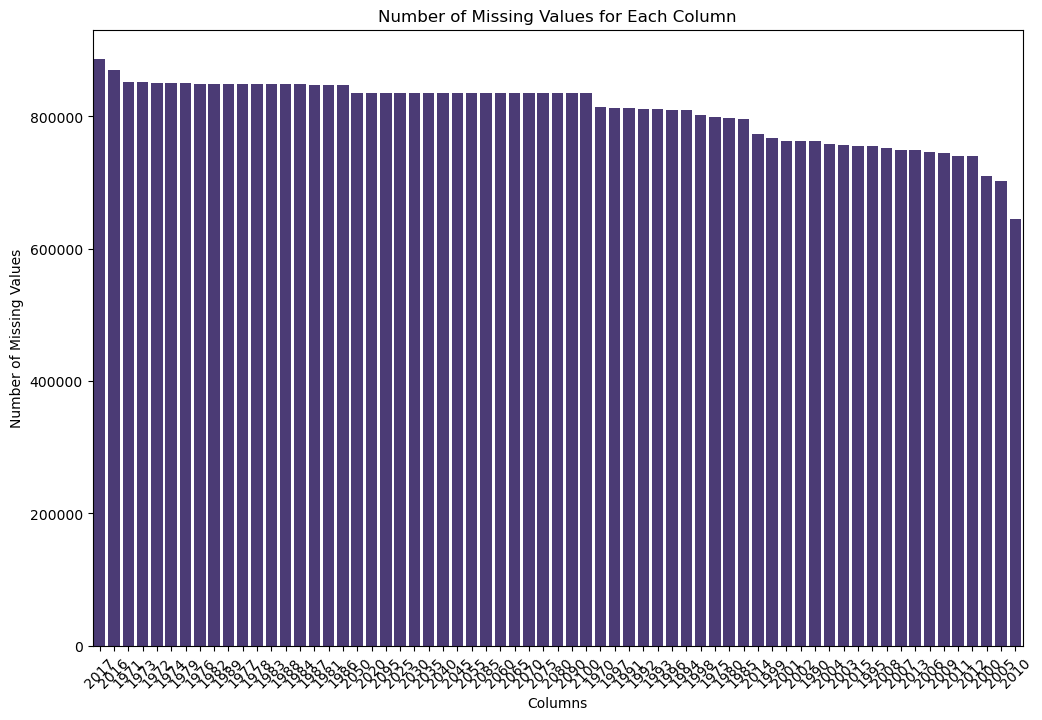

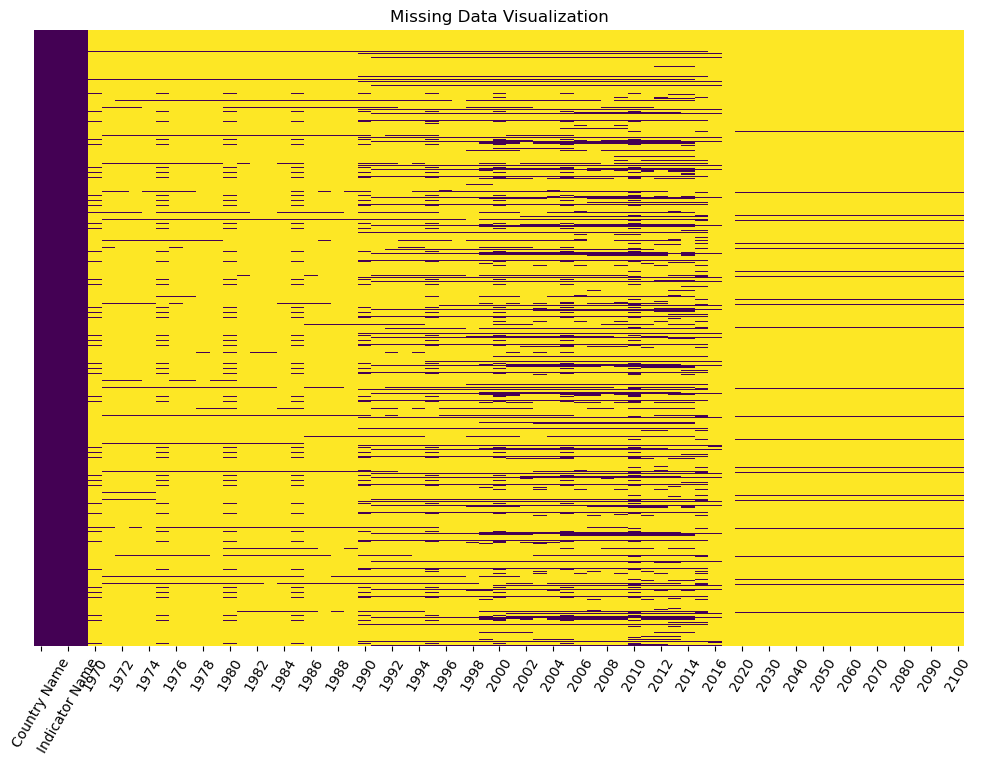



9. Dimensions of EdStatsData:
Number of rows: 886930
Number of columns: 69


In [532]:
# Exploring EdStatsData
explore_df(DATA, "EdStatsData")

> <u>Notes:</u>
>
> The EdStatsData dataset is a rich and voluminous set that covers 242 countries with 3,665 unique indicators, spanning 886,930 rows and 70 columns. The data extends over a period from 1970 to 2100, although some years between 2017 and 2100 are missing or grouped in five-year intervals.
>
> The first four columns, which are of object type, provide contextual information about the countries and indicators, while the subsequent columns, primarily of type float64, contain the indicator values for each year.
>
> A major challenge with this dataset is the significant amount of missing data. Specifically, 65 have more than 70% missing data.
>
> Despite these challenges, the diversity and depth of the data offer a valuable opportunity to extract relevant insights that can guide ACADEMY's strategic decisions regarding international expansion.


[Back to top](#top)

### 2 - <u>EdStatsCountry :</u><a id='stats-country'></a>



Exploration of EdStatsCountry: 




1. Preview of EdStatsCountry:


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN
240,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN




2. Removing Columns with 100% Missing Data in EdStatsCountry:
There are 28 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 4
1 column dropped because it had 100% missing values: Unnamed: 31


After Filtering Out Irrelevant Data:
There are 27 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 3


,Missing Values,Missing Percentages (%)
National accounts reference year,209,86.72
Alternative conversion factor,194,80.50
Other groups,183,75.93
Latest industrial data,134,55.60
Vital registration complete,130,53.94
External debt Reporting status,117,48.55
Latest household survey,100,41.49
Latest agricultural census,99,41.08
Lending category,97,40.25
PPP survey year,96,39.83




3. General Information about EdStatsCountry:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                               

,National accounts reference year,Latest industrial data,Latest trade data
count,32.00000,107.000000,185.000000
mean,2001.53125,2008.102804,2010.994595
std,5.24856,2.616834,2.569675
min,1987.00000,2000.000000,1995.000000
25%,1996.75000,2007.500000,2011.000000
50%,2002.00000,2009.000000,2012.000000
75%,2005.00000,2010.000000,2012.000000
max,2012.00000,2010.000000,2012.000000




7. Unique Values for Categorical Columns of EdStatsCountry:
- Unique values for Country Code: 241
- Unique values for Short Name: 241
- Unique values for Table Name: 241
- Unique values for Long Name: 241
- Unique values for 2-alpha code: 239
- Unique values for Currency Unit: 153
- Unique values for Special Notes: 132
- Unique values for Region: 8
['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' nan 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']
- Unique values for Income Group: 6
['High income: nonOECD' 'Low income' 'Upper middle income' nan
 'Lower middle income' 'High income: OECD']
- Unique values for WB-2 code: 241
- Unique values for National accounts base year: 44
- Unique values for SNA price valuation: 3
['Value added at basic prices (VAB)'
 'Value added at producer prices (VAP)' nan]
- Unique values for Lending category: 4
[nan 'IDA' 'IBRD' 'Blend']
- Unique values for Other groups: 3
[nan 'HIPC' 'Euro area']
- U

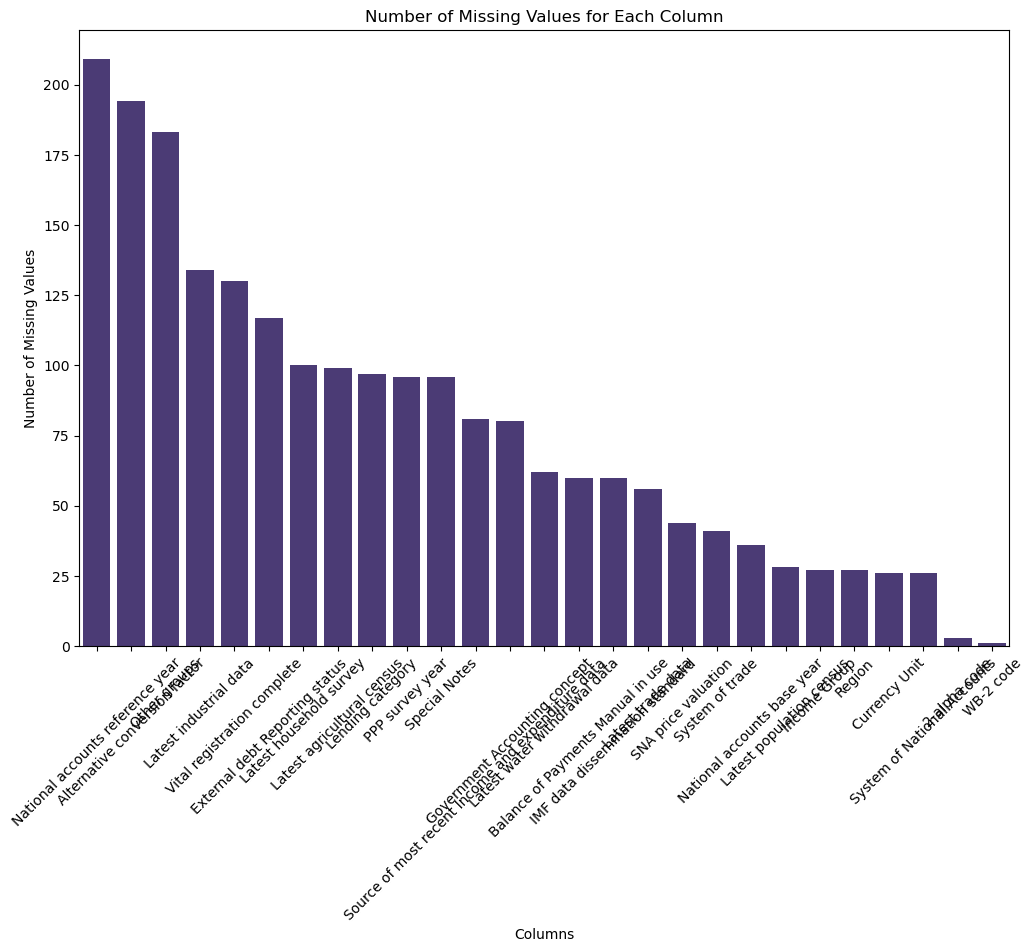

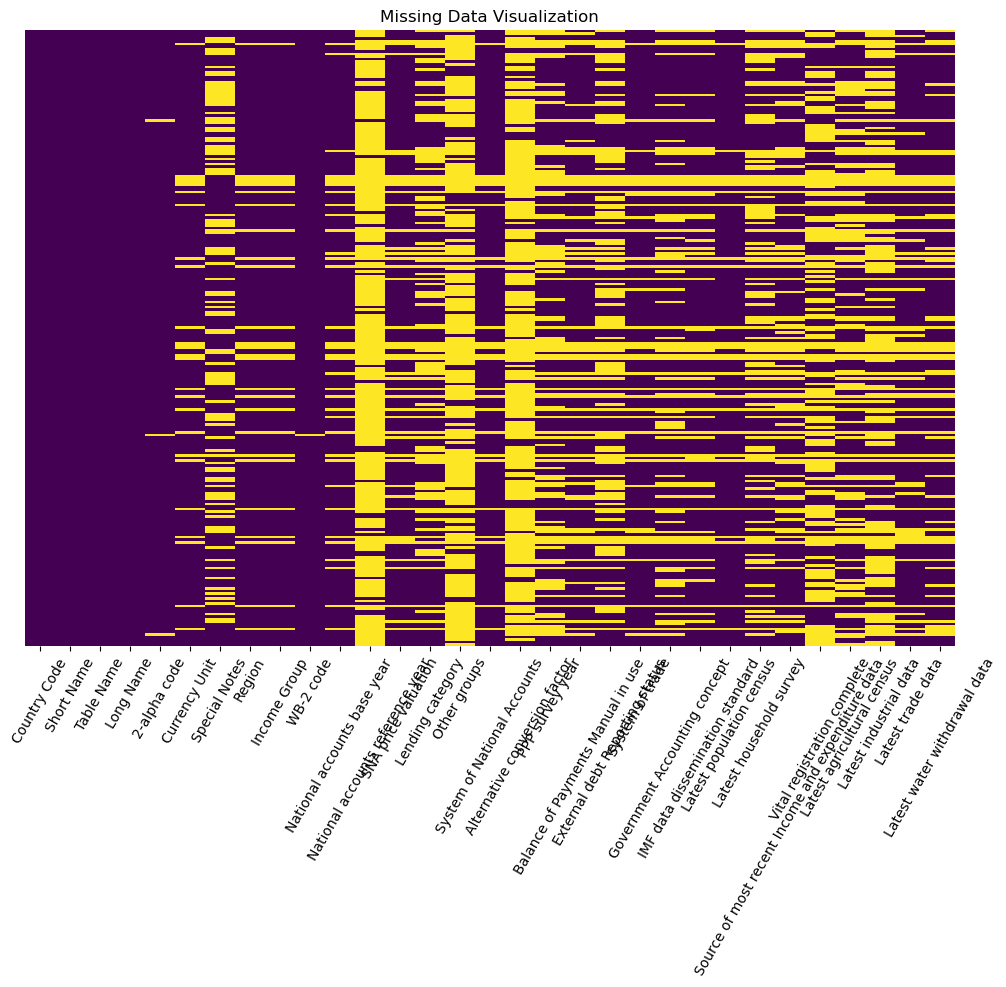



9. Dimensions of EdStatsCountry:
Number of rows: 241
Number of columns: 31


In [533]:
# Exploring EdStatsCountry
explore_df(COUNTRY, "EdStatsCountry")

> <u>Notes:</u>
>
> The EdStatsCountry dataset provides metadata on 241 countries, covering aspects such as country codes, names, regions, and income groups. Special attention will need to be given to these columns during the data cleaning phase. The presence of 7 unique regions offers a perspective for grouping and analyzing countries based on geographical criteria.


[Back to top](#top)

### 3 - <u>EdStatsCountry-Series :</u><a id='stats-country-series'></a>

In [534]:
# Exploring EdStatsCountry-Series
explore_df(COUNTRY_SERIES, "EdStatsCountry-Series")



Exploration of EdStatsCountry-Series: 




1. Preview of EdStatsCountry-Series:


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
612,ZWE,SP.POP.GROW,Data sources: United Nations World Population ...,NaN




2. Removing Columns with 100% Missing Data in EdStatsCountry-Series:
There are 1 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 1
1 column dropped because it had 100% missing values: Unnamed: 3


After Filtering Out Irrelevant Data:
There are no columns with the specified percentage of missing data.


,Missing Values,Missing Percentages (%)




3. General Information about EdStatsCountry-Series:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryCode  613 non-null    object
 1   SeriesCode   613 non-null    object
 2   DESCRIPTION  613 non-null    object
dtypes: object(3)
memory usage: 14.5+ KB


4. Data Types in EdStatsCountry-Series:
object    3
dtype: int64


5. Duplicate Rows in EdStatsCountry-Series:
There are no duplicate rows based on lines.


6. Descriptive Statistics for EdStatsCountry-Series:


,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...
freq,18,211,154




7. Unique Values for Categorical Columns of EdStatsCountry-Series:
- Unique values for CountryCode: 211
- Unique values for SeriesCode: 21
['SP.POP.TOTL' 'SP.POP.GROW' 'NY.GDP.PCAP.PP.CD' 'NY.GDP.MKTP.PP.KD'
 'NY.GNP.MKTP.PP.CD' 'NY.GDP.MKTP.PP.CD' 'NY.GDP.PCAP.PP.KD'
 'NY.GNP.PCAP.PP.CD' 'SP.POP.1564.TO.ZS' 'SP.POP.TOTL.MA.ZS'
 'SP.POP.TOTL.FE.ZS' 'SP.POP.0014.TO.ZS' 'NY.GNP.PCAP.CD' 'NY.GDP.PCAP.CD'
 'NY.GDP.PCAP.KD' 'SP.POP.1564.MA.IN' 'SP.POP.0014.TO' 'SP.POP.1564.TO'
 'SP.POP.1564.FE.IN' 'SP.POP.0014.MA.IN' 'SP.POP.0014.FE.IN']
- Unique values for DESCRIPTION: 97


8. Visualization of Missing Data in EdStatsCountry-Series:
There are no missing values in the dataset.


9. Dimensions of EdStatsCountry-Series:
Number of rows: 613
Number of columns: 3


> <u>Notes:</u>
>
> The EdStatsCountry-Series dataset contains metadata related to 211 countries and 21 unique series codes. Although the dataset is relatively smaller with 613 rows and 3 columns, it provides valuable information about the source of indicators for each country.

[Back to top](#top)

### 4 - <u>EdStatsSeries :</u><a id='stats-series'></a>



Exploration of EdStatsSeries: 




1. Preview of EdStatsSeries:


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Tertiary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN




2. Removing Columns with 100% Missing Data in EdStatsSeries:
There are 16 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 15
6 columns dropped because it they had 100% missing values: Unit of measure, Notes from original source, Other web links, Related indicators, License Type, Unnamed: 20


After Filtering Out Irrelevant Data:
There are 10 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 9


,Missing Values,Missing Percentages (%)
Development relevance,3662,99.92
Limitations and exceptions,3651,99.62
General comments,3651,99.62
Statistical concept and methodology,3642,99.37
Aggregation method,3618,98.72
Periodicity,3566,97.30
Related source links,3450,94.13
Base Period,3351,91.43
Other notes,3113,84.94
Short definition,1509,41.17




3. General Information about EdStatsSeries:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Series Code                          3665 non-null   object
 1   Topic                                3665 non-null   object
 2   Indicator Name                       3665 non-null   object
 3   Short definition                     2156 non-null   object
 4   Long definition                      3665 non-null   object
 5   Periodicity                          99 non-null     object
 6   Base Period                          314 non-null    object
 7   Other notes                          552 non-null    object
 8   Aggregation method                   47 non-null     object
 9   Limitations and exceptions           14 non-null     object
 10  General comments                     14 non-null     object
 1

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
count,3665,3665,3665,2156,3665,99,314,552,47,14,14,3665,23,3,215
unique,3665,37,3665,1169,2060,1,4,14,3,9,8,31,2,1,1
top,BAR.NOED.1519.FE.ZS,Learning Outcomes,Barro-Lee: Percentage of female population age...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Annual,Projections (2010 to 2100),EGRA,Weighted average,Data should be used cautiously because of diff...,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm
freq,1,1046,1,215,215,99,308,403,31,3,3,1269,20,3,215




7. Unique Values for Categorical Columns of EdStatsSeries:
- Unique values for Series Code: 3665
- Unique values for Topic: 37
- Unique values for Indicator Name: 3665
- Unique values for Short definition: 1170
- Unique values for Long definition: 2060
- Unique values for Periodicity: 2
[nan 'Annual']
- Unique values for Base Period: 5
[nan '2010' '2011' 'Projections (2010 to 2100)' '14']
- Unique values for Other notes: 15
[nan 'EGRA' 'PISA' 'Proficiency' 'All Levels' 'Primary' 'Secondary'
 'Tertiary' 'Social Protection & Labor: Unemployment'
 'Health: Population: Structure' 'Single Level Attainment/ Not Cumulative'
 'Cumulative Attainment' 'Mean Years of Schooling' 'Pre-Primary'
 'Post-secondary']
- Unique values for Aggregation method: 4
[nan 'Weighted average' 'Gap-filled total' 'Sum']
- Unique values for Limitations and exceptions: 10
[nan
 'Operators have traditionally been the main source of telecommunications data, so information on subscriptions has been widely available for

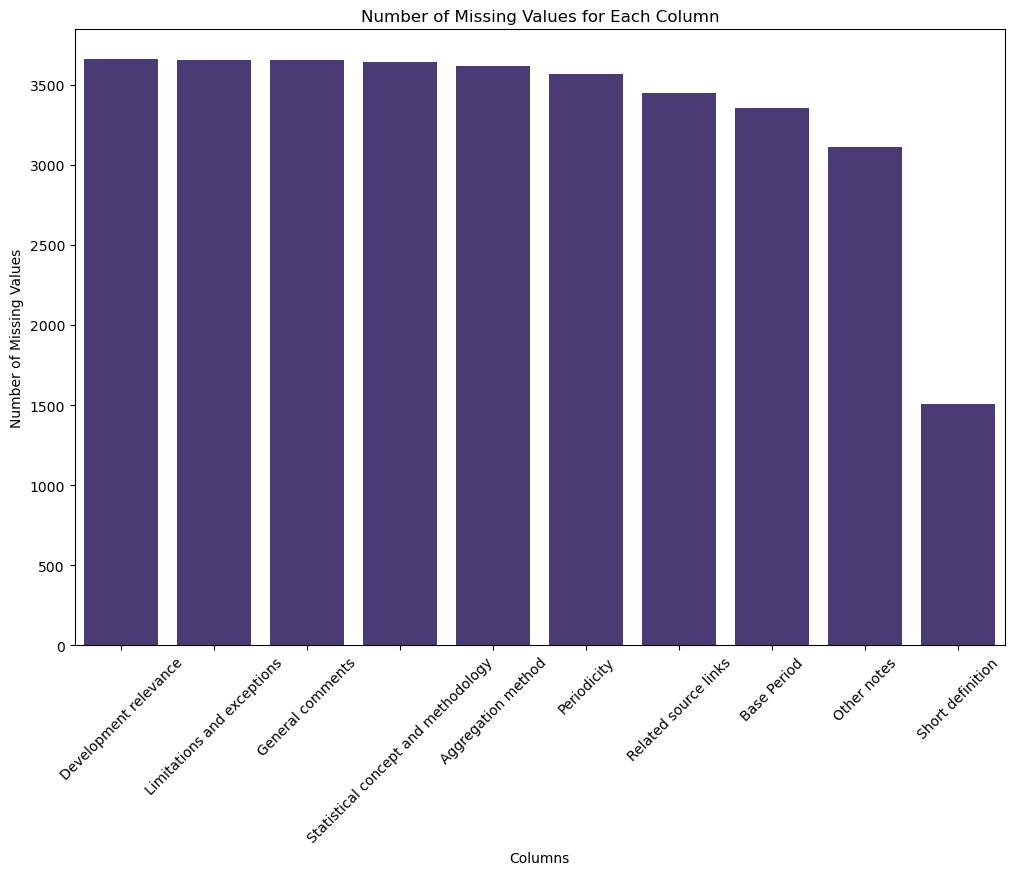

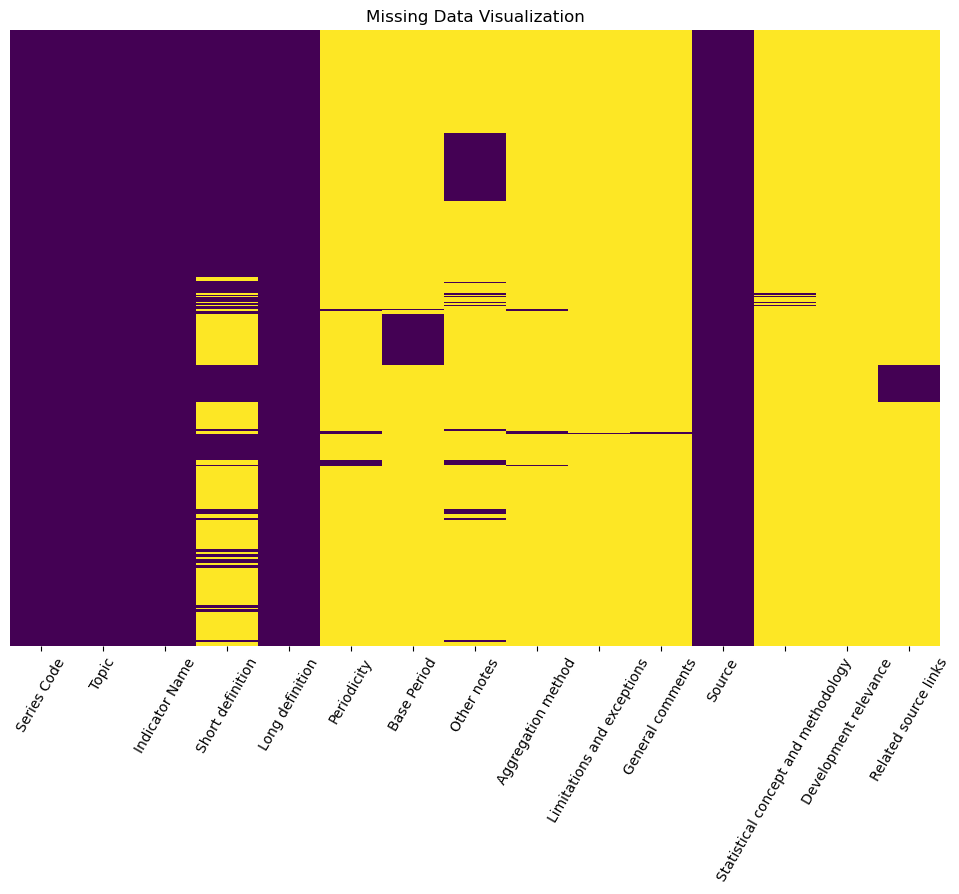



9. Dimensions of EdStatsSeries:
Number of rows: 3665
Number of columns: 15


In [535]:
# Exploring EdStatsSeries
explore_df(SERIES, "EdStatsSeries")

> <u>Notes:</u>
>
> After removing the empty data,EdStatsSeries is a dataset that provides details on 3,665 unique indicators, covering various topics and themes. With 3,665 rows and 15 columns, this dataset is essential for understanding the meaning and context of each indicator. However they appear to contain a large amount of missing data. These columns will need to be examined carefully during the data cleaning phase.

[Back to top](#top)

### 5 - <u>EdStatsFootNote :</u><a id='stats-foot-note'></a>

In [536]:
# Exploring EdStatsFootNote
explore_df(FOOT_NOTE, "EdStatsFootNote")



Exploration of EdStatsFootNote: 




1. Preview of EdStatsFootNote:


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN
643637,ZWE,SP.POP.GROW,YR2017,5-year average value between 0s and 5s,NaN




2. Removing Columns with 100% Missing Data in EdStatsFootNote:
There are 1 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 1
1 column dropped because it had 100% missing values: Unnamed: 4


After Filtering Out Irrelevant Data:
There are no columns with the specified percentage of missing data.


,Missing Values,Missing Percentages (%)




3. General Information about EdStatsFootNote:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CountryCode  643638 non-null  object
 1   SeriesCode   643638 non-null  object
 2   Year         643638 non-null  object
 3   DESCRIPTION  643638 non-null  object
dtypes: object(4)
memory usage: 19.6+ MB


4. Data Types in EdStatsFootNote:
object    4
dtype: int64


5. Duplicate Rows in EdStatsFootNote:
There are no duplicate rows based on lines.


6. Descriptive Statistics for EdStatsFootNote:


,CountryCode,SeriesCode,Year,DESCRIPTION
count,643638,643638,643638,643638
unique,239,1558,56,9102
top,LIC,SH.DYN.MORT,YR2004,Country Data
freq,7320,9226,27128,191188




7. Unique Values for Categorical Columns of EdStatsFootNote:
- Unique values for CountryCode: 239
- Unique values for SeriesCode: 1558
- Unique values for Year: 56
- Unique values for DESCRIPTION: 9102


8. Visualization of Missing Data in EdStatsFootNote:
There are no missing values in the dataset.


9. Dimensions of EdStatsFootNote:
Number of rows: 643638
Number of columns: 4


> <u>Notes:</u>
>
> After removing the empty data,the EdStatsFootNote dataset provides additional notes for the indicators, offering context and further details for 643,638 unique entries.

[Back to top](#top)

### <u>Analysis note:</u><a id='analysis-note'></a>

#### 1. sData
- **Country Name**: Name of the countries.
- **Country Code**: Unique code of the country.
- **Indicator Name**: Name of the indicator.
- **Indicator Code**: Unique code of the indicator.
- **Years**: Years corresponding to each data point.

#### 2. sCountry
- **Country Code**: A unique identifier for each country.
- **Table Name**: The official name of the country as per ISO standards.
- **Region**: The geographical region to which the country belongs.
- **Income Group**:  Categorizes the country's economic status.

#### 3. sCountry Serie
- **Country Code**: Unique code of the country.
- **Series Code**: Unique code of the indicator.
- **Description**: Provides the source or origin of the specific indicator.

#### 4. sSerie
- **Series Code**: Unique code of the indicator.
- **Topic**: The broader category or theme to which the indicator belongs.
- **Indicator Name**: Name of the indicator.

#### 5. sFoot
Contains similar information to sCountry, but with the added year of the indicator and a detailed description of the data source.


#### General Observations
- No duplicate rows were found across all files.
- Several columns have a significant number of missing values.


#### Conclusion
Based on this information, the most relevant columns for our Ed-Tech study are: Country Name, Indicator Code, Country Code, Region, Income Group, Series Code, and Years.

[Back to top](#top)

## Data Cleaning <a id='data-cleaning'></a>
> Ensuring the quality and reliability of the dataset by addressing missing values, duplicates, and inconsistencies.

### Relevant Indicators <a id='relevant indicators'></a>

##### Indicator Groups:

1. **BAR**: 
    - **Description**: Barro-Lee indicators, aggregated over 5 years across 7 education levels.
    - **Significance**: Provides an overview of education levels over multiple years.

2. **HH**: 
    - **Description**: Combines DHS (Demographic and Health Surveys) and MICS (Multiple Indicator Cluster Surveys).
    - **Significance**: Provides essential demographic and health information.

3. **IT**: 
    - **Description**: Infrastructure: internet users and computers.
    - **Significance**: Measure of digital connectivity and access to computing.

4. **LO**: 
    - **Description**: Learning Outcomes (Assessment of student levels in science, reading, etc.).
    - **Significance**: Assessment of student academic performances.

5. **NY**: 
    - **Description**: National Accounts, domestic and national products.
    - **Significance**: Provides an overview of a region's or country's economic health.
    
6. **OECD**: 
    - **Description**: OECD, public sector teacher salaries.
    - **Significance**: Insights into teacher compensation, an indicator of investment in education.
    
7. **PRJ**: 
    - **Description**: Wittgenstein Projections (schooling duration, populations, etc.).
    - **Significance**: Forecasts on schooling duration and demographic trends.

8. **SABER**: 
    - **Description**: System Approach for Better Education.
    - **Significance**: Systematic assessment of education quality.

9. **SE**: 
    - **Description**: Social Education.
    - **Significance**: Indicators related to education in a social context.

10. **SL**:
    - **Description**: Social Labor.
    - **Significance**: Indicators related to labor and employment.

11. **SH**: 
    - **Description**: Social Health.
    - **Significance**: Indicators related to population health.

12. **SP**: 
    - **Description**: Social Population.
    - **Significance**: Demographic indicators.

13. **UIS**: 
    - **Description**: UNESCO Institute for Statistics.
    - **Significance**: Official statistics related to global education.

14. **XGDP**: 
    - **Description**: Public expenditure in education.
    - **Significance**: Measure of government investment in education.

In [537]:
# List of relevant indicator groups
indic_group = ["BAR", "IT", "NY", "SE", "UIS", "SP", "XGDP"]

# Loop through each indicator group
for group in indic_group:
        # Filter the dataset for the current indicator group
    df_group = DATA[DATA["Indicator Code"].str.contains(group, na=False)]
    
    # Check if any data is returned after filtering
    if df_group.empty:
        print(f"No data found for the indicator group {group}.")
    else:
        print(f"The indicator group '{group}' is checked.")

The indicator group 'BAR' is checked.
The indicator group 'IT' is checked.
The indicator group 'NY' is checked.
The indicator group 'SE' is checked.
The indicator group 'UIS' is checked.
The indicator group 'SP' is checked.
The indicator group 'XGDP' is checked.


[Back to top](#top)

##### Relevant indicators:

Given our focus on students in upper secondary school and tertiary education aged 15 to 24, and the necessity for them to have access to a computer and the internet, the following indicators are crucial:

Here's a breakdown of the indicators:
- **UIS.E.3**: This represents the total number of students enrolled in both public and private upper secondary education institutions, irrespective of their age.

- **IT.CMP.PCMP.P2**: This indicates the number of personal computers per 100 people. Personal computers are standalone devices intended for individual use.

- **IT.NET.USER.P2**: This represents the number of internet users per 100 people. Internet users are defined as individuals who have accessed the internet (from any location) in the past 3 months. The internet can be accessed via various devices such as computers, mobile phones, PDAs, gaming consoles, digital TVs, etc.

- **SE.TER.ENRL**: This is the total number of students enrolled in both public and private tertiary education institutions.

- **SE.XPD.TOTL.GD.ZS**: This indicates the total expenditure (current, capital, and transfers) by local, regional, and central governments on education, expressed as a percentage of the GDP.

- **SP.POP.1524.TO.UN**: This represents the total population aged between 15 and 24.

In conclusion, we have identified 6 key indicators that will be instrumental for our analysis.


In [538]:
# List of relevant indicators for the analysis
relevant_indicators = [
    'SE.TER.ENRL',        # Total students enrolled in tertiary education
    'UIS.E.3',            # Total students enrolled in upper secondary education
    'IT.NET.USER.P2',     # Internet users per 100 people
    'IT.CMP.PCMP.P2',     # Personal computers per 100 people
    'SE.XPD.TOTL.GD.ZS',  # Government expenditure on education as % of GDP
    'SP.POP.1524.TO.UN'   # Total population aged between 15 and 24
]

# Iterate over each indicator in relevant_indicators
for indicator in relevant_indicators:
    
    # Filter the dataset for the current indicator
    df_indicator = DATA[DATA["Indicator Code"].isin([indicator])]
    
    # Check if any data is returned after filtering
    if df_indicator.empty:
        print(f"No data found for the indicator '{indicator}'.")
    else:
        print(f"Data for the indicator '{indicator}' has been verified.")


Data for the indicator 'SE.TER.ENRL' has been verified.
Data for the indicator 'UIS.E.3' has been verified.
Data for the indicator 'IT.NET.USER.P2' has been verified.
Data for the indicator 'IT.CMP.PCMP.P2' has been verified.
Data for the indicator 'SE.XPD.TOTL.GD.ZS' has been verified.
Data for the indicator 'SP.POP.1524.TO.UN' has been verified.


[Back to top](#top)

##### Conclusion:
The above indicator groups cover a wide range of aspects related to education, demographics, economy, and health. They will be instrumental for a thorough and comprehensive analysis.

[Back to top](#top)

### Refinement and Removal of Irrelevant Data <a id='refinement-and-removal'></a>

#### 1 - <u>EdStatsData</u> <a id='refinement-stats-data'></a>

<u>**Filtering by Relevant Indicators:**</u>

> We'll narrow down our dataset to only include rows that match our predefined relevant indicators.

In [539]:
filtered_rows = []  # To store rows that match the criteria
already_added_indices = set()  # To track indices of rows that have been added

for group in indic_group:
    current_group_data = data[data['Indicator Code'].str.contains(group, na=False)]
    
    # Filter out rows that have already been added
    current_group_data = current_group_data[~current_group_data.index.isin(already_added_indices)]
    
    # Update the set of added indices
    already_added_indices.update(current_group_data.index)
    
    filtered_rows.extend(current_group_data.values)

# Convert the list of rows back to a DataFrame
data = pd.DataFrame(filtered_rows, columns=data.columns)

<u>**Reviewing the Refined Dataset:**</u>
> After the above steps, let's review the structure of our refined dataset.



Exploration of EdStatsData: 




1. Preview of EdStatsData:


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.15UP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.1519,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Barro-Lee: Average years of primary schooling,...",BAR.PRM.SCHL.2024.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
499967,"Yemen, Rep.",YEM,Government expenditure in tertiary institution...,XGDP.56.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499968,Zambia,ZMB,Government expenditure in secondary institutio...,XGDP.23.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499969,Zambia,ZMB,Government expenditure in tertiary institution...,XGDP.56.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499970,Zimbabwe,ZWE,Government expenditure in secondary institutio...,XGDP.23.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499971,Zimbabwe,ZWE,Government expenditure in tertiary institution...,XGDP.56.FSGOV.FDINSTADM.FFD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




2. Removing Columns with 100% Missing Data in EdStatsData:
There are 66 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 63
19 columns dropped because it they had 100% missing values: Unnamed: 69, 2095, 2075, 2070, 2090, 2065, 2060, 2055, 2050, 2045, 2085, 2040, 2035, 2030, 2100, 2025, 2020, 2017, 2080


After Filtering Out Irrelevant Data:
There are 47 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 44


,Missing Values,Missing Percentages (%)
2016,485973,97.20
1971,464582,92.92
1973,464577,92.92
1972,464503,92.91
1974,464395,92.88
1979,463331,92.67
1976,462649,92.53
1989,462630,92.53
1982,462640,92.53
1977,462559,92.52




3. General Information about EdStatsData:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499972 entries, 0 to 499971
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    499972 non-null  object 
 1   Country Code    499972 non-null  object 
 2   Indicator Name  499972 non-null  object 
 3   Indicator Code  499972 non-null  object 
 4   1970            72145 non-null   float64
 5   1971            35390 non-null   float64
 6   1972            35469 non-null   float64
 7   1973            35395 non-null   float64
 8   1974            35577 non-null   float64
 9   1975            87148 non-null   float64
 10  1976            37323 non-null   float64
 11  1977            37413 non-null   float64
 12  1978            37411 non-null   float64
 13  1979            36641 non-null   float64
 14  1980            88951 non-null   float64
 15  1981            38600 non-null   float64
 16  1982        

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,7.214500e+04,3.539000e+04,3.546900e+04,3.539500e+04,3.557700e+04,8.714800e+04,3.732300e+04,3.741300e+04,3.741100e+04,3.664100e+04,...,1.291050e+05,1.310060e+05,1.320820e+05,1.862860e+05,1.365070e+05,1.345190e+05,1.326670e+05,1.092620e+05,6.634500e+04,1.399900e+04
mean,1.978687e+09,4.271307e+09,4.611786e+09,5.126640e+09,5.424722e+09,2.318483e+09,5.756380e+09,6.150793e+09,6.700913e+09,7.470822e+09,...,1.990723e+10,2.082163e+10,2.038728e+10,1.548184e+10,2.265365e+10,2.382502e+10,2.513834e+10,2.789404e+10,4.649509e+10,2.274461e+11
std,1.212887e+11,1.808557e+11,1.918124e+11,2.063527e+11,2.116684e+11,1.376305e+11,2.220287e+11,2.330484e+11,2.479432e+11,2.667046e+11,...,7.698050e+11,8.045923e+11,7.907520e+11,7.093987e+11,8.848527e+11,9.242710e+11,9.684947e+11,1.044147e+12,1.367503e+12,3.077412e+12
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00
25%,8.900000e-01,8.757727e+00,9.143300e+00,9.491930e+00,9.755760e+00,1.390758e+00,9.199330e+00,9.450290e+00,9.941700e+00,9.917550e+00,...,1.323655e+01,1.270000e+01,1.281892e+01,5.482047e+00,1.212356e+01,1.230581e+01,1.403229e+01,1.762066e+01,9.382697e+01,4.982447e+01
50%,6.270000e+00,6.289017e+01,6.621196e+01,6.930641e+01,7.057755e+01,9.600000e+00,7.078519e+01,7.115939e+01,7.277665e+01,7.501749e+01,...,1.112452e+02,1.050223e+02,1.032010e+02,4.936957e+01,1.000000e+02,1.000000e+02,1.056810e+02,1.051835e+02,5.496100e+04,2.483200e+04
75%,6.200000e+01,5.748025e+04,5.951200e+04,6.284850e+04,6.463600e+04,7.802419e+01,5.768650e+04,5.842500e+04,6.070450e+04,6.524300e+04,...,1.642310e+05,1.558365e+05,1.524730e+05,2.964050e+04,1.359455e+05,1.448135e+05,1.581785e+05,1.844145e+05,5.419760e+05,9.393745e+05
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,8.469145e+13,8.711022e+13,8.677516e+13,9.134676e+13,9.506314e+13,9.999473e+13,1.054580e+14,1.108060e+14,1.156198e+14,1.206030e+14




7. Unique Values for Categorical Columns of EdStatsData:
- Unique values for Country Name: 242
- Unique values for Country Code: 242
- Unique values for Indicator Name: 2066
- Unique values for Indicator Code: 2066


8. Visualization of Missing Data in EdStatsData:


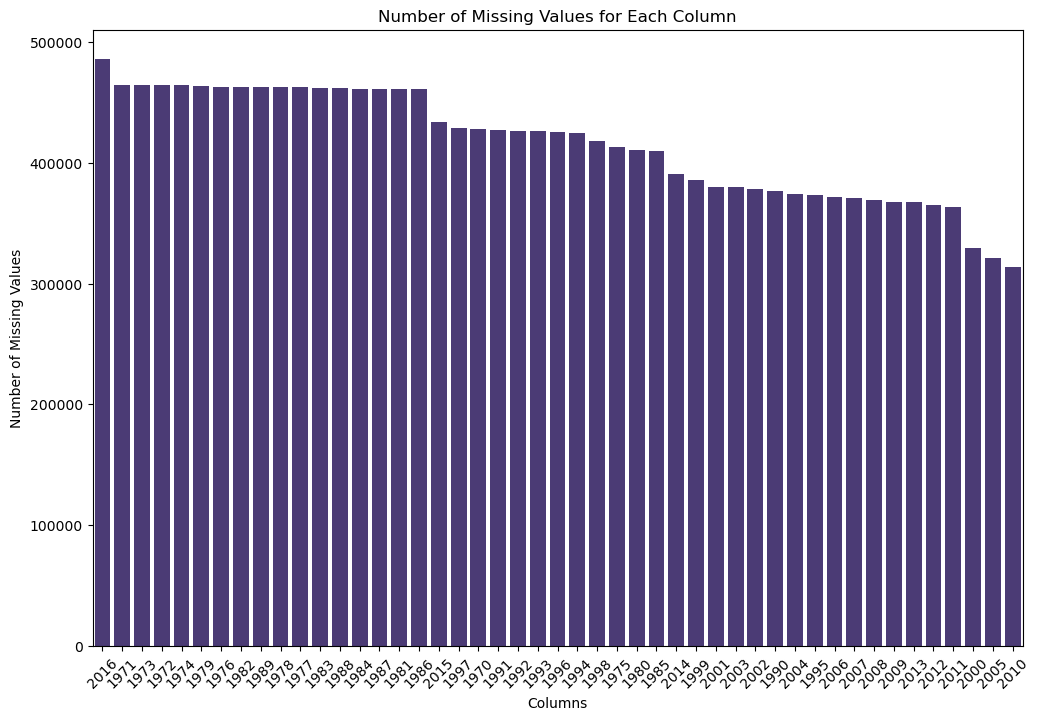

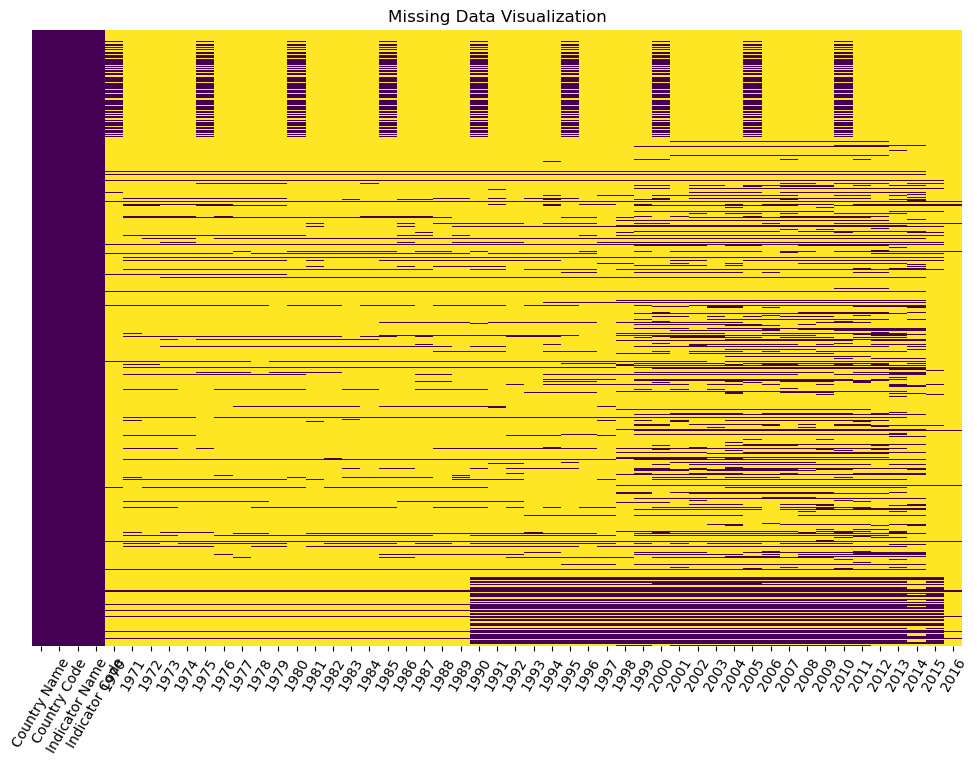



9. Dimensions of EdStatsData:
Number of rows: 499972
Number of columns: 51


In [540]:
explore_df(data, "EdStatsData")

[Back to top](#top)

#### 2 - <u>EdStatsCountry</u> <a id='cleaning-stats-country'></a>

<u>**Displaying the columns of the COUNTRY dataset:**</u>

In [541]:
COUNTRY.columns.tolist()

['Country Code',
 'Short Name',
 'Table Name',
 'Long Name',
 '2-alpha code',
 'Currency Unit',
 'Special Notes',
 'Region',
 'Income Group',
 'WB-2 code',
 'National accounts base year',
 'National accounts reference year',
 'SNA price valuation',
 'Lending category',
 'Other groups',
 'System of National Accounts',
 'Alternative conversion factor',
 'PPP survey year',
 'Balance of Payments Manual in use',
 'External debt Reporting status',
 'System of trade',
 'Government Accounting concept',
 'IMF data dissemination standard',
 'Latest population census',
 'Latest household survey',
 'Source of most recent Income and expenditure data',
 'Vital registration complete',
 'Latest agricultural census',
 'Latest industrial data',
 'Latest trade data',
 'Latest water withdrawal data']

<u>**Filtering the dataset to retain only relevant columns:**</u>

In [542]:
country = country[['Country Code', 'Short Name', 'Table Name', 'Long Name']]

<u>**Displaying the refined 'country' dataset:**</u>

In [543]:
display(country)

,Country Code,Short Name,Table Name,Long Name
0,ABW,Aruba,Aruba,Aruba
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan
2,AGO,Angola,Angola,People's Republic of Angola
3,ALB,Albania,Albania,Republic of Albania
4,AND,Andorra,Andorra,Principality of Andorra
...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen
238,ZAF,South Africa,South Africa,Republic of South Africa
239,ZMB,Zambia,Zambia,Republic of Zambia


<u>**Displaying columns with missing values:**</u>

In [544]:
missing_values_table(country)

There are no columns with the specified percentage of missing data.


,Missing Values,Missing Percentages (%)


<u>**Displaying the structure of the refined dataset:**</u>

In [545]:
title("Post-Refinement Overview:")
print(f"- Number of rows: {country.shape[0]}")
print(f"- Number of columns: {country.shape[1]}")



Post-Refinement Overview:
- Number of rows: 241
- Number of columns: 4


<u>**Displaying the 'country_series' dataset (assuming you intended to display it):**</u>

In [546]:
display(country)

,Country Code,Short Name,Table Name,Long Name
0,ABW,Aruba,Aruba,Aruba
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan
2,AGO,Angola,Angola,People's Republic of Angola
3,ALB,Albania,Albania,Republic of Albania
4,AND,Andorra,Andorra,Principality of Andorra
...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen
238,ZAF,South Africa,South Africa,Republic of South Africa
239,ZMB,Zambia,Zambia,Republic of Zambia


[Back to top](#top)

#### 3 - <u>EdStatsCountrySeries</u> <a id='cleaning-stats-country-series'></a>

<u>**Displaying the columns of the 'country_series' dataset:**</u>

In [547]:
country_series.columns.tolist()

['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3']

<u>**Displaying columns with missing values in the 'country_series' dataset:**</u>

In [548]:
missing_values_table(country_series)

There are 1 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 1


,Missing Values,Missing Percentages (%)
Unnamed: 3,613,100.0


<u>**Dropping columns that contain 100% missing values:**</u>

In [549]:
drop_columns(country_series, 100)

There are 1 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 1
1 column dropped because it had 100% missing values: Unnamed: 3


<u>**Displaying the refined 'country_series' dataset after dropping columns:**</u>

In [550]:
display(country_series)

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...
...,...,...,...
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United..."
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...


[Back to top](#top)

#### 4 - <u>EdStatsSeries</u> <a id='cleaning-stats-series'></a>

<u>**Displaying the columns of the 'series' dataset:**</u>

In [551]:
series.columns.tolist()

['Series Code',
 'Topic',
 'Indicator Name',
 'Short definition',
 'Long definition',
 'Unit of measure',
 'Periodicity',
 'Base Period',
 'Other notes',
 'Aggregation method',
 'Limitations and exceptions',
 'Notes from original source',
 'General comments',
 'Source',
 'Statistical concept and methodology',
 'Development relevance',
 'Related source links',
 'Other web links',
 'Related indicators',
 'License Type',
 'Unnamed: 20']

<u>**Filtering the 'series' dataset to keep only the relevant columns:**</u>

In [552]:
series = series[['Series Code','Topic','Indicator Name','Notes from original source','Other web links','Related indicators','License Type']]
display(series)

,Series Code,Topic,Indicator Name,Notes from original source,Other web links,Related indicators,License Type
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,NaN,NaN,NaN,NaN


<u>**Displaying columns with missing values in the 'series' dataset:**</u>

In [553]:
missing_values_table(series)

There are 4 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 4


,Missing Values,Missing Percentages (%)
Notes from original source,3665,100.0
Other web links,3665,100.0
Related indicators,3665,100.0
License Type,3665,100.0


<u>**Dropping columns that contain 100% missing values:**</u>

In [554]:
drop_columns(series, 100)

There are 4 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 4
4 columns dropped because it they had 100% missing values: Notes from original source, Other web links, Related indicators, License Type


<u>**Displaying the refined 'series' dataset after dropping columns:**</u>

In [555]:
display(series)

,Series Code,Topic,Indicator Name
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...
...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...


[Back to top](#top)

#### 5 - <u>EdStatsFootNote</u> <a id='cleaning-stats-foot-note'></a>

<u>**Displaying the columns of the 'foot_note' dataset:**</u>

In [556]:
foot_note.columns.tolist()

['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4']

<u>**Displaying columns with missing values in the 'foot_note' dataset:**</u>

In [557]:
missing_values_table(foot_note)

There are 1 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 1


,Missing Values,Missing Percentages (%)
Unnamed: 4,643638,100.0


<u>**Dropping columns that contain 100% missing values:**</u>

In [558]:
drop_columns(foot_note, 100)

There are 1 columns with the specified percentage of missing data.
Total columns that have missing data >= 70%: 1
1 column dropped because it had 100% missing values: Unnamed: 4


<u>**Displaying the refined 'foot_note' dataset after dropping columns:**</u>

In [559]:
display(foot_note)

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.
...,...,...,...,...
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s


[Back to top](#top)